<a href="https://colab.research.google.com/github/ErhanBULUT60/Fruit_Resnet/blob/main/Fruit_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install keras-resnet
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import itertools

In [22]:
# re-size all the images
IMAGE_SIZE= [100,100]

# Config of traning
epochs=16
batch_size=128

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/fruits-360.zip

--2023-10-02 17:51:00--  https://lazyprogrammer.me/course_files/fruits-360.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-10-02 17:51:01 ERROR 403: Forbidden.



In [ ]:
train_path='fruits-360/Training'
valid_path='fruits-360/Validation'


In [ ]:
!unzip -nq fruits-360.zip

unzip:  cannot find or open fruits-360.zip, fruits-360.zip.zip or fruits-360.zip.ZIP.


In [ ]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')
print(len(image_files))

0


In [ ]:
folders = glob(train_path + '/*')

In [ ]:
plt.imshow(image.load_img(np.random.choice(image_files)))

In [ ]:
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in res.layers:
  layer.trainable=False

In [ ]:
x= Flatten()(res.output)
# x= Dense(1000, activation='relu')(x) #example
prediction= Dense (len(folders), activation='softmax')(x)

In [ ]:
model= Model(inputs=res.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#ImageDataGenerator instance
train_gen=ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, preprocessing_function=preprocess_input)
val_gen= ImageDataGenerator(preprocessing_function=preprocess_input
                            )

In [ ]:
# test generator to see how it works and some other useful things
test_gen= val_gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None]*len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 9673 images belonging to 60 classes.
{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Apricot': 10, 'Avocado': 11, 'Avocado ripe': 12, 'Banana': 13, 'Banana Red': 14, 'Cactus fruit': 15, 'Carambula': 16, 'Cherry': 17, 'Clementine': 18, 'Cocos': 19, 'Dates': 20, 'Granadilla': 21, 'Grape Pink': 22, 'Grape White': 23, 'Grape White 2': 24, 'Grapefruit Pink': 25, 'Grapefruit White': 26, 'Guava': 27, 'Huckleberry': 28, 'Kaki': 29, 'Kiwi': 30, 'Kumquats': 31, 'Lemon': 32, 'Lemon Meyer': 33, 'Limes': 34, 'Litchi': 35, 'Mandarine': 36, 'Mango': 37, 'Maracuja': 38, 'Nectarine': 39, 'Orange': 40, 'Papaya': 41, 'Passion Fruit': 42, 'Peach': 43, 'Peach Flat': 44, 'Pear': 45, 'Pear Abate': 46, 'Pear Monster': 47, 'Pear Williams': 48, 'Pepino': 49, 'Pineapple': 50, 'Pitahaya Red': 51, 'Plum': 52, 'Pomegranate': 53, 'Quince': 54, 'Ra

min: -88.68 max: 151.061


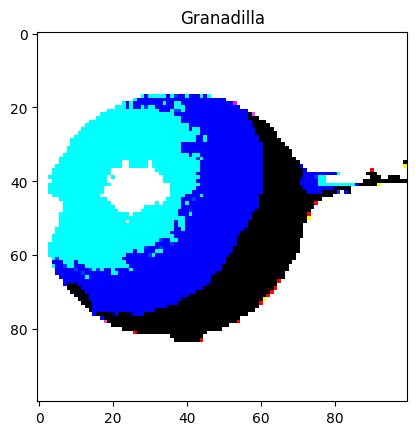

In [ ]:
#Plot the strangely colored image
for x,y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show
  break


In [ ]:
from numpy.random.mtrand import shuffle
# create generators
train_generators = train_gen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 shuffle=True,
                                                 batch_size=batch_size,
                                                 class_mode='sparse')
valid_genarator= val_gen.flow_from_directory(valid_path,
                                             target_size=IMAGE_SIZE,
                                             shuffle=False,
                                             batch_size=batch_size,
                                             class_mode='sparse')

Found 28736 images belonging to 60 classes.
Found 9673 images belonging to 60 classes.


In [ ]:
# fit
r = model.fit(
    train_generators,
    validation_data = valid_genarator,
    epochs = epochs,
    steps_per_epoch=len(image_files)//batch_size,
              validation_steps=len(valid_image_files)//batch_size,)